In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib
import matplotlib.pyplot as plt

# get data
train = pd.read_csv("train.csv")
y = train['label']
X = train.drop(['label'], axis=1)

#X = X.values.reshape(-1,28,28)
X = X.values
y = y.values

# delete train to gain some space
del train

print("Shape of X:{0}".format(X.shape))
print("Shape of y:{0}".format(y.shape))

Shape of X:(42000, 784)
Shape of y:(42000,)


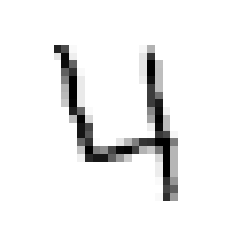

In [2]:
# get single digit graphical data
# to display it, we need to convert single line of 784 values to 28x28 square
digit_image = X[3].reshape(28,28)

plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [3]:
# split data for test and for training
# data before split_index will go for training and
#  data after split_index will go for testing
split_index = int(X.shape[0]*0.8)

X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [4]:
y_train_5 = y_train == 5 # True for all 5s, False for all other digits
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10)
sgd_clf.fit(X_train, y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

i=0;
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Correct ratio for fold {1}: {0}".format(n_correct / len(y_pred), i))
    i += 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Correct ratio for fold 0: 0.961875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Correct ratio for fold 1: 0.9653571428571428
Correct ratio for fold 2: 0.9591964285714286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.961875  , 0.96535714, 0.95919643])

In [8]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90883929, 0.90651786, 0.9125    ])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print("First 10 predictions of number 5: {0}".format(y_train_pred[:10]))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


First 10 predictions of number 5: [False False False False False False False False False False]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[30043,   509],
       [  763,  2285]], dtype=int64)

In [10]:
from sklearn.metrics import precision_score, recall_score
print("precision score = ",precision_score(y_train_5, y_train_pred))
print("recall score = ",recall_score(y_train_5, y_train_pred))

precision score =  0.8178239083750894
recall score =  0.7496719160104987


In [11]:
from sklearn.metrics import f1_score
score = f1_score(y_train_5, y_train_pred)
print("f1 score = ",score)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)

f1 score =  0.78226634714139


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[-536679.57534815 -533065.69261978 -269745.01119454 ... -229613.95125251
 -770136.39801893 -562533.43089464]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


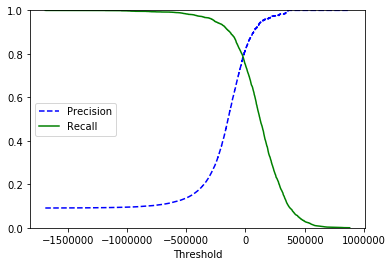

In [12]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Score for 1st digit: -499597.52556745283
Was this digit a real 5? False


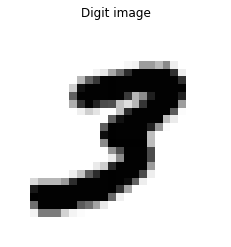

In [14]:
y_scores = sgd_clf.decision_function([X_train[0]])
print("Score for 1st digit: {0}".format(y_scores[0]))
print("Was this digit a real 5? {0}".format(y_train_5[0]))

digit_image = X_train[0].reshape(28,28)
plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.title("Digit image")
plt.show()

In [15]:
threshold = -250000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

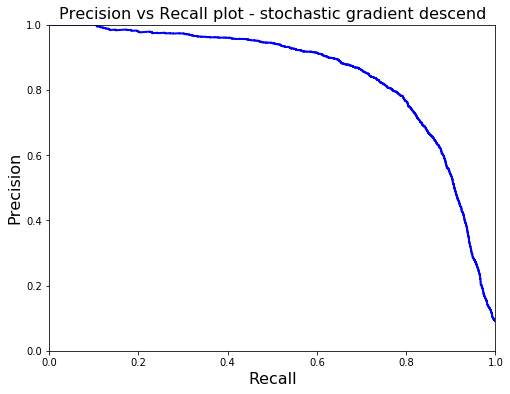

In [16]:
def print_recalls_precision(recalls, precisions, title):
    plt.figure(figsize=(8,6))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.title("Precision vs Recall plot - {0}".format(title), fontsize=16)
    plt.axis([0,1,0,1])
    plt.show()
print_recalls_precision(recalls, precisions, "stochastic gradient descend")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


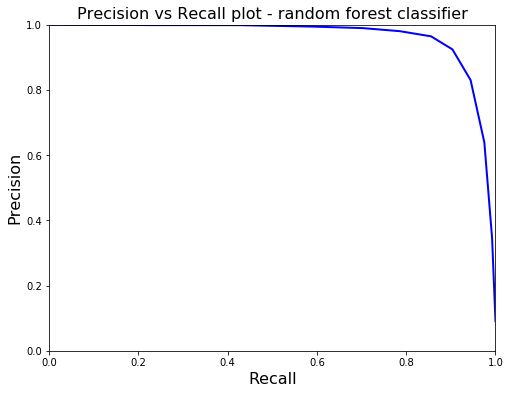

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
# y_probas_forest contains 2 columns, one per class. Each row's sum of probabilities is equal to 1
y_scores_forest = y_probas_forest[:,1]

precisions_forest, recalls_forest, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

print_recalls_precision(recalls_forest, precisions_forest, "random forest classifier")

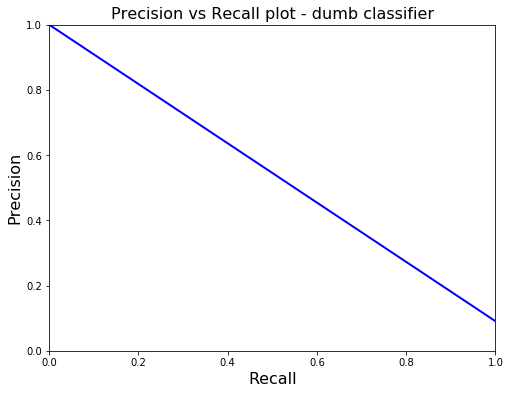

In [18]:
never_5_predictions = cross_val_predict(never_5_clf, X_train, y_train_5, cv=3)
precisions_dumb, recalls_dumb, thresholds = precision_recall_curve(y_train_5, never_5_predictions)
print_recalls_precision(recalls_dumb, precisions_dumb, "dumb classifier")

(0, 1)

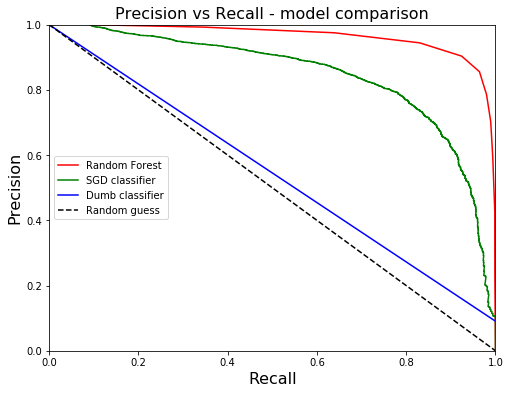

In [19]:
plt.figure(figsize=(8,6))
plt.plot(precisions_forest, recalls_forest, "r-", label="Random Forest")
plt.plot(precisions, recalls, "g-", label="SGD classifier")
plt.plot(recalls_dumb, precisions_dumb, "b-", label="Dumb classifier")
plt.plot([0, 1], [1,0], "k--", label="Random guess")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title("Precision vs Recall - model comparison", fontsize=16)
plt.axis([0,1,0,1])
plt.legend(loc="center left")
plt.ylim([0, 1])

In [20]:
print("F1 score for dumb classifier: {0}".format(f1_score(y_train_5, never_5_predictions)))
print("F1 score for SGD classifier: {0}".format(f1_score(y_train_5, y_train_pred)))
print("F1 score for Random Forest: {0}".format(f1_score(y_train_5, y_scores_forest > 0.5)))

F1 score for dumb classifier: 0.0
F1 score for SGD classifier: 0.78226634714139
F1 score for Random Forest: 0.872177713037145


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
